<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/portfolio/pca_portfolio_Nifty_500portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
def get_nifty50_tickers():
    #data = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/data/main/STOCKS100.txt', sep='\t')
    data=pd.read_csv('/content/nifty-500.csv')
    nifty100 = data['NSE Code'].apply(lambda x: x + ".NS").tolist()
    reject_lst=['MOTHERSUMI.NS', 'CADILAHC.NS', 'ADANITRANS.NS', 'SRTRANSFIN.NS', 'INFRATEL-EQ.NS','HDFC.NS','LTI.NS']
    nifty_final= [item for item in nifty100 if item not in reject_lst]

    return nifty_final
# Function to retrieve Nifty 50 stock data
def get_nifty_50_data():

    nifty_50_symbols=get_nifty50_tickers()

    start_date = "2023-01-01"
    end_date = "2024-02-28"

    nifty_50_data = yf.download(nifty_50_symbols, start=start_date, end=end_date)["Adj Close"]
    return nifty_50_data

nifty_50_data=get_nifty_50_data()

[*********************100%%**********************]  501 of 501 completed


In [16]:
returns = nifty_50_data.pct_change().fillna(0)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(returns)

In [17]:
# Inverse transform to get stock representations in the original space
recovered_data = pca.inverse_transform(reduced_data)

# Calculate L-2 norm for each stock
l2_norm = np.linalg.norm(returns.values - recovered_data, axis=0)

# Create a DataFrame with stock symbols and their L-2 norms
norm_df = pd.DataFrame({"Symbol": returns.columns, "L2 Norm": l2_norm})

# Select top and bottom stocks based on L-2 norm differences
max_diff_portfolio = norm_df.nlargest(10, "L2 Norm")["Symbol"]
min_diff_portfolio = norm_df.nsmallest(10, "L2 Norm")["Symbol"]





In [18]:
print("Max Difference Portfolio:", max_diff_portfolio.tolist())
print("Min Difference Portfolio:", min_diff_portfolio.tolist())


Max Difference Portfolio: ['CGCL.NS', 'BCG.NS', 'FACT.NS', 'ALOKINDS.NS', 'ITI.NS', 'OLECTRA.NS', 'MMTC.NS', 'PAYTM.NS', 'ZEEL.NS', 'JBMA.NS']
Min Difference Portfolio: ['BATAINDIA.NS', 'HINDUNILVR.NS', 'MARUTI.NS', 'ICICIBANK.NS', 'ARE&M.NS', 'PFIZER.NS', 'ASIANPAINT.NS', 'SUNPHARMA.NS', 'NESTLEIND.NS', 'KOTAKBANK.NS']


In [19]:
min_diff= min_diff_portfolio.tolist()

In [20]:
max_diff=max_diff_portfolio.tolist()

In [21]:
min_diff

['BATAINDIA.NS',
 'HINDUNILVR.NS',
 'MARUTI.NS',
 'ICICIBANK.NS',
 'ARE&M.NS',
 'PFIZER.NS',
 'ASIANPAINT.NS',
 'SUNPHARMA.NS',
 'NESTLEIND.NS',
 'KOTAKBANK.NS']

In [22]:
max_diff

['CGCL.NS',
 'BCG.NS',
 'FACT.NS',
 'ALOKINDS.NS',
 'ITI.NS',
 'OLECTRA.NS',
 'MMTC.NS',
 'PAYTM.NS',
 'ZEEL.NS',
 'JBMA.NS']

[*********************100%%**********************]  10 of 10 completed


<Figure size 1000x600 with 0 Axes>

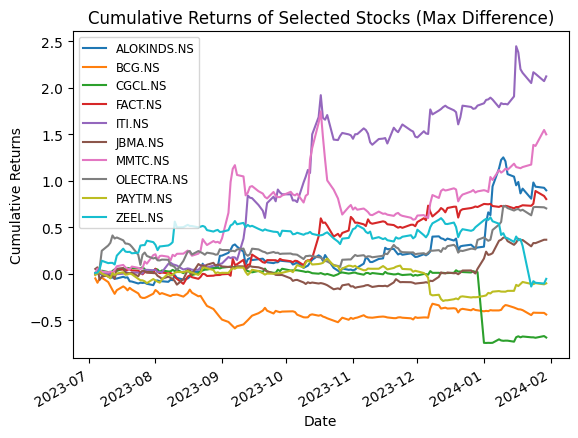

In [23]:
import matplotlib.pyplot as plt

# List of stocks
stock_symbols = max_diff
# Download historical data
start_date = "2023-07-01"
end_date = "2024-01-31"  # Use the current date or a specific end date

stock_data = yf.download(stock_symbols, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
daily_returns = stock_data.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot(title='Cumulative Returns of Selected Stocks (Max Difference)', xlabel='Date', ylabel='Cumulative Returns')
plt.legend(loc='upper left', fontsize='small')
plt.show()


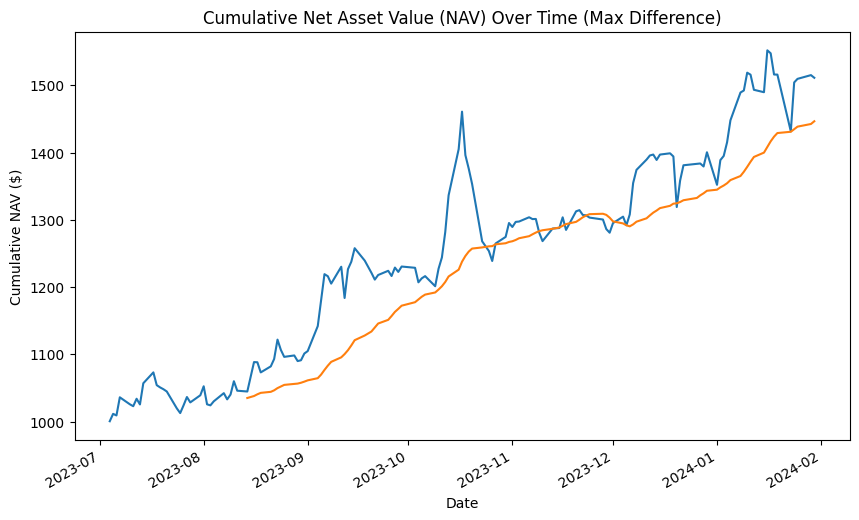

In [24]:
# Investment amount
initial_investment = 100
# Calculate daily returns
daily_returns = stock_data.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns.dropna()).cumprod() - 1

# Calculate NAV
nav_values = initial_investment * (1 + cumulative_returns)
# Calculate cumulative NAV for the entire portfolio
cumulative_nav = nav_values.sum(axis=1)

# Plot cumulative NAV for the entire portfolio
plt.figure(figsize=(10, 6))
cumulative_nav.plot(title='Cumulative Net Asset Value (NAV) Over Time (Max Difference)', xlabel='Date', ylabel='Cumulative NAV ($)')
cumulative_nav.rolling(window=30).mean().plot()
plt.show()

[*********************100%%**********************]  1 of 1 completed


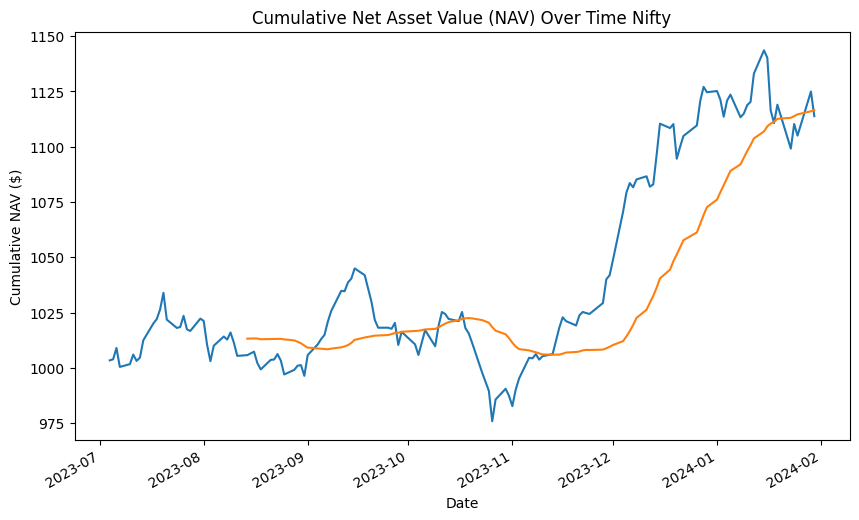

In [25]:
# Investment amount
initial_investment = 1000
# Calculate daily returns
nifty_data=yf.download('^nsei', start=start_date, end=end_date)["Adj Close"]
daily_returns = nifty_data.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns.dropna()).cumprod() - 1

# Calculate NAV
nav_values = initial_investment * (1 + cumulative_returns)
# Calculate cumulative NAV for the entire portfolio
cumulative_nav = nav_values

# Plot cumulative NAV for the entire portfolio
plt.figure(figsize=(10, 6))
cumulative_nav.plot(title='Cumulative Net Asset Value (NAV) Over Time Nifty', xlabel='Date', ylabel='Cumulative NAV ($)')
cumulative_nav.rolling(window=30).mean().plot()
plt.show()

In [26]:
#max_diff
feb23=['PEL.NS','YESBANK.NS','GLAND.NS','BANDHANBNK.NS','BAJAJHLDNG.NS','ADANIGREEN.NS','NMDC.NS','HINDPETRO.NS','PNB.NS','IGL.NS']
mar23=['PEL.NS','ADANIGREEN.NS','YESBANK.NS','ADANIENT.NS','GLAND.NS','BANDHANBNK.NS','BAJAJHLDNG.NS','NMDC.NS','INDUSTOWER.NS','PNB.NS'],
apr23=['PEL.NS','ADANIGREEN.NS', 'YESBANK.NS','GLAND.NS','ADANIENT.NS','BANDHANBNK.NS','INDUSTOWER.NS','BAJAJHLDNG.NS','NMDC.NS','PNB.NS'],
may23=['PEL.NS','ADANIGREEN.NS','GLAND.NS','YESBANK.NS','ADANIENT.NS','INDUSTOWER.NS','BANDHANBNK.NS','NMDC.NS','PNB.NS','DIVISLAB.NS'],
jun23=['PEL.NS','ADANIGREEN.NS','GLAND.NS','YESBANK.NS','INDUSTOWER.NS','ADANIENT.NS','BANDHANBNK.NS','NMDC.NS','BAJAJHLDNG.NS','DIVISLAB.NS'],
july23=['GLAND.NS','ADANIGREEN.NS','YESBANK.NS','INDUSTOWER.NS','NMDC.NS','ADANIENT.NS','DIVISLAB.NS','AMBUJACEM.NS','BAJAJHLDNG.NS','BANDHANBNK.NS']

In [27]:
def find_items_not_in_other(list1, list2):
    """
    Find items in list1 that are not in list2.

    Args:
    - list1: The first list
    - list2: The second list

    Returns:
    - A list of items that are in list1 but not in list2
    """
    return list(set(list1) - set(list2))

# Example usage:
feb23=['PEL.NS','YESBANK.NS','GLAND.NS','BANDHANBNK.NS','BAJAJHLDNG.NS','ADANIGREEN.NS','NMDC.NS','HINDPETRO.NS','PNB.NS','IGL.NS']
mar23=['PEL.NS','ADANIGREEN.NS','YESBANK.NS','ADANIENT.NS','GLAND.NS','BANDHANBNK.NS','BAJAJHLDNG.NS','NMDC.NS','INDUSTOWER.NS','PNB.NS']
apr23=['PEL.NS','ADANIGREEN.NS', 'YESBANK.NS','GLAND.NS','ADANIENT.NS','BANDHANBNK.NS','INDUSTOWER.NS','BAJAJHLDNG.NS','NMDC.NS','PNB.NS']
may23=['PEL.NS','ADANIGREEN.NS','GLAND.NS','YESBANK.NS','ADANIENT.NS','INDUSTOWER.NS','BANDHANBNK.NS','NMDC.NS','PNB.NS','DIVISLAB.NS']
jun23=['PEL.NS','ADANIGREEN.NS','GLAND.NS','YESBANK.NS','INDUSTOWER.NS','ADANIENT.NS','BANDHANBNK.NS','NMDC.NS','BAJAJHLDNG.NS','DIVISLAB.NS']
july23=['GLAND.NS','ADANIGREEN.NS','YESBANK.NS','INDUSTOWER.NS','NMDC.NS','ADANIENT.NS','DIVISLAB.NS','AMBUJACEM.NS','BAJAJHLDNG.NS','BANDHANBNK.NS']

items_not_in_mar23 = find_items_not_in_other(apr23, may23)
print("Items in apr23 but not in mar23:", items_not_in_mar23)


Items in apr23 but not in mar23: ['BAJAJHLDNG.NS']


In [28]:
not_in_mar23 = []
for item in apr23:
  if item not in mar23:
    not_in_mar23.append(item)

print(not_in_mar23)

[]
